## 1. Einleitung / Ziel des Projekts 📺

Dieses Projekt untersucht **YouTube-Trending-Videos** und sucht nach Mustern,  
die beeinflussen, **welche Videos viral gehen**.

**Fragestellungen:**
- **Welche Kategorien tauchen besonders oft auf?**
- **Gibt es Zusammenhänge zwischen Views, Likes und Kommentaren?**
- **Wie lange bleibt ein Video im Trend?**


## 2. Daten laden & Überblick 🧐

Wir laden die Daten (`DE_youtube_trending_data.csv`)  
und verschaffen uns einen ersten Überblick:
- **Wie viele Zeilen und Spalten gibt es?**
- **Welche Spalten sind enthalten?**
- **Gibt es fehlende Werte?**


In [3]:
import pandas as pd

# Daten laden
df = pd.read_csv("../data/DEvideos.csv")

# Ersten Blick auf die Daten werfen
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...


## 3. Erste Datenprüfung 🧪

Ziel:
- **Größe des Datensatzes ermitteln**
- **Spaltennamen und Datentypen prüfen**
- **Fehlende Werte identifizieren**


In [4]:
# Größe des Datensatzes
df.shape

# Datentypen und Speicherverbrauch prüfen
df.info()

# Fehlende Werte prüfen
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40840 entries, 0 to 40839
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40840 non-null  object
 1   trending_date           40840 non-null  object
 2   title                   40840 non-null  object
 3   channel_title           40840 non-null  object
 4   category_id             40840 non-null  int64 
 5   publish_time            40840 non-null  object
 6   tags                    40840 non-null  object
 7   views                   40840 non-null  int64 
 8   likes                   40840 non-null  int64 
 9   dislikes                40840 non-null  int64 
 10  comment_count           40840 non-null  int64 
 11  thumbnail_link          40840 non-null  object
 12  comments_disabled       40840 non-null  bool  
 13  ratings_disabled        40840 non-null  bool  
 14  video_error_or_removed  40840 non-null  bool  
 15  de

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               1552
dtype: int64

## 4. Erste Verteilungen der Erfolgskennzahlen 📊

Ziel:
- **Wie verteilen sich Views, Likes und Kommentare?**
- **Sind die Werte extrem unterschiedlich (z. B. einige Videos mit Millionen, andere mit wenigen)?**


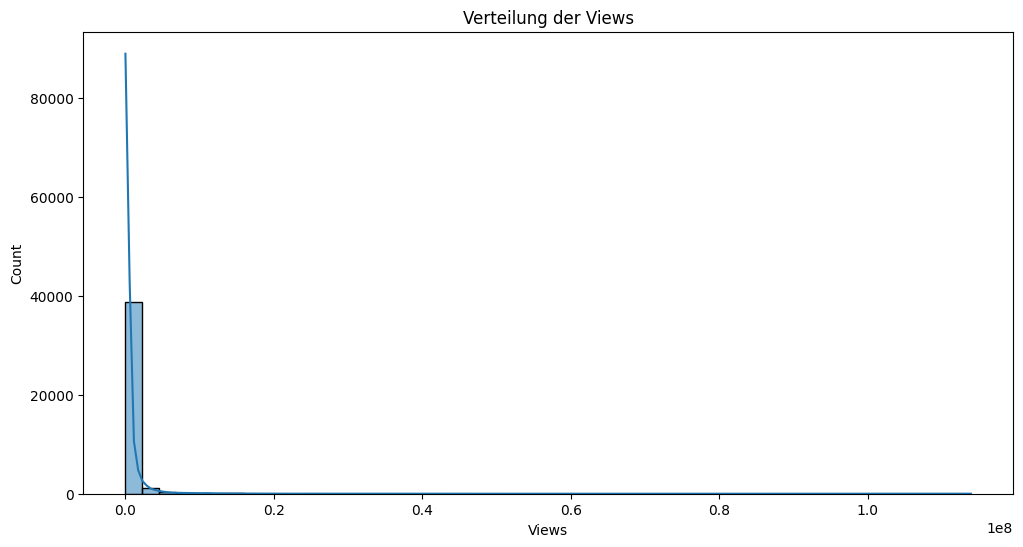

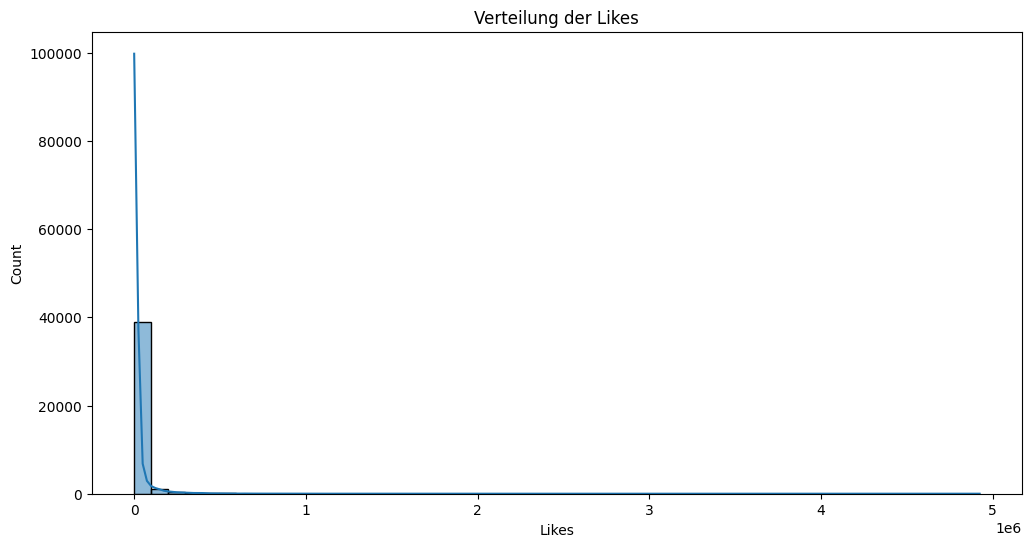

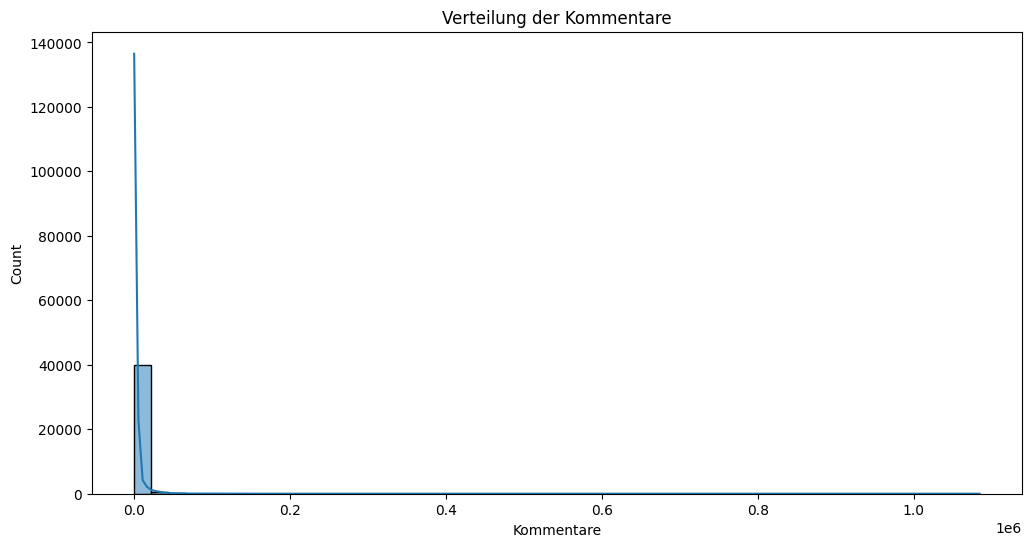

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Größe der Plots einstellen
plt.figure(figsize=(12, 6))

# Views
sns.histplot(df['views'], bins=50, kde=True)
plt.title("Verteilung der Views")
plt.xlabel("Views")
plt.show()

# Likes
plt.figure(figsize=(12, 6))
sns.histplot(df['likes'], bins=50, kde=True)
plt.title("Verteilung der Likes")
plt.xlabel("Likes")
plt.show()

# Kommentare
plt.figure(figsize=(12, 6))
sns.histplot(df['comment_count'], bins=50, kde=True)
plt.title("Verteilung der Kommentare")
plt.xlabel("Kommentare")
plt.show()


## 5. Kennzahlen der Erfolgsmetriken 🧮

Ziel:
- **Verteilungen nicht nur visuell, sondern auch numerisch auswerten.**
- **Extreme Werte (Ausreißer) und typische Größenordnungen erkennen.**

Wir berechnen die **beschreibenden Kennzahlen für Views, Likes und Kommentare**.


In [6]:
# Kennzahlen für Views, Likes, Kommentare
views_stats = df['views'].describe()
likes_stats = df['likes'].describe()
comments_stats = df['comment_count'].describe()

views_stats, likes_stats, comments_stats


(count    4.084000e+04
 mean     6.034553e+05
 std      2.348963e+06
 min      5.180000e+02
 25%      2.706875e+04
 50%      1.192770e+05
 75%      4.431015e+05
 max      1.138762e+08
 Name: views, dtype: float64,
 count    4.084000e+04
 mean     2.187550e+04
 std      1.018000e+05
 min      0.000000e+00
 25%      5.330000e+02
 50%      2.699000e+03
 75%      1.179625e+04
 max      4.924056e+06
 Name: likes, dtype: float64,
 count    4.084000e+04
 mean     2.785857e+03
 std      1.745803e+04
 min      0.000000e+00
 25%      7.900000e+01
 50%      3.760000e+02
 75%      1.376000e+03
 max      1.084435e+06
 Name: comment_count, dtype: float64)

## 5. Auswertung der Erfolgsmetriken 📊

### 📈 Views – Aufrufe
| Kennzahl           | Wert              | Interpretation |
|--------------------|-------------------|----------------|
| **Mittelwert (Mean)** | **603.455** Views | **Durchschnittlich 600k Views**, aber **durch wenige Mega-Hits verzerrt**. |
| **Median (50%)**   | **119.277** Views | **Typisches Video hat 120k Views** → **Median < Mean → Ausreißer-Effekt**. |
| **Maximum**         | **113.876.200** Views | **Top-Video mit 113 Mio. Views → Mega-Viral!** |
| **25%-Quantil**     | **27.068 Views**  | **25% der Videos < 27k Views → Viele kleine Videos.** |
| **75%-Quantil**     | **443.101 Views** | **Nur 25% > 443k Views → Konzentration auf wenige Hits.** |

➡️ **Typisches YouTube-Bild: Wenige Videos räumen extrem ab, viele bleiben im 5-stelligen Bereich.**

---

### ❤️ Likes
| Kennzahl           | Wert               | Interpretation |
|--------------------|--------------------|----------------|
| **Mittelwert (Mean)** | **21.875 Likes** | **Durchschnitt 22k Likes**, aber auch **verzerrt durch Hits**. |
| **Median (50%)**   | **2.699 Likes**    | **Typisches Video hat nur ca. 2.700 Likes → viele kleinere Videos.** |
| **Maximum**         | **4.924.056 Likes** | **Top-Video mit knapp 5 Mio. Likes → viral!** |
| **25%-Quantil**     | **533 Likes**      | **25% < 533 Likes → viele kleine Kanäle/Nischen.** |
| **75%-Quantil**     | **11.796 Likes**   | **Nur 25% > 12k Likes → Konzentration auf wenige Erfolgsfälle.** |

➡️ **Ähnlich wie Views → Plattform-Effekt, wenige "Hits", viele kleine.**

---

### 💬 Kommentare
| Kennzahl           | Wert               | Interpretation |
|--------------------|--------------------|----------------|
| **Mittelwert (Mean)** | **2.786 Kommentare** | **Durchschnitt 2.800 Kommentare**, aber **stark verzerrt.** |
| **Median (50%)**   | **376 Kommentare** | **Typisches Video hat nur 376 Kommentare → geringe Community-Interaktion.** |
| **Maximum**         | **1.084.435 Kommentare** | **Top-Video mit 1 Mio. Kommentaren → Event/viral.** |
| **25%-Quantil**     | **79 Kommentare**  | **25% < 79 Kommentare → geringe Interaktion.** |
| **75%-Quantil**     | **1.376 Kommentare** | **Nur 25% > 1.376 Kommentare → aktive Community selten.** |

➡️ **Kommentare sind noch extremer → Viele Videos haben kaum Interaktion.**

---

## 🧠 **Zusammenfassung:**
- **Krasser Ausreißereffekt:** Wenige Videos räumen extrem ab, viele Videos haben moderate Zahlen.
- **"Winner takes it all":** Top-Videos dominieren die Reichweite (Millionen Views, Likes, Kommentare).
- **Engagement ≠ Reichweite:** **Viele Views heißt nicht automatisch viele Kommentare** – **Community-Interaktion ist was Eigenes.**




## 6. Top 10 Videos nach Views 🔥

Da die Verteilungen extrem verzerrt sind, schauen wir uns die **Top-10-Videos** nach Views genauer an:
- **Welche Kanäle dominieren?**
- **Gibt es bestimmte Themen oder Kategorien?**
- **Haben die Top-Videos auch besonders viele Likes & Kommentare?**


In [7]:
# Top 10 Videos nach Views
top_views = df.nlargest(10, 'views')[['title', 'channel_title', 'views', 'likes', 'comment_count']]
top_views


,title,channel_title,views,likes,comment_count
5455,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217,2811217,787174
5221,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567,2656675,682890
4062,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,80360459,2513103,335920
5004,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,75969469,2251819,827755
3808,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,74789251,2444956,330710
36291,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,73463137,4924056,1084435
34104,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600,2478908,263984
3601,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,66637636,2331354,316185
35954,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,65396157,4750254,1040912
35699,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,62796390,4470888,905912


## 7. Welche Kategorien dominieren die Trends? 🏆

Nachdem wir die Top 10 Videos analysiert haben,  
wollen wir jetzt herausfinden, **welche Kategorien allgemein die YouTube-Trends in Deutschland dominieren**.

Dazu gruppieren wir die Videos nach der **Spalte `category_id`**  
und vergleichen die **Summe der Views pro Kategorie**.


In [8]:
# Gruppieren nach Kategorie & Summe der Views
category_views = df.groupby('category_id')['views'].sum().sort_values(ascending=False)
category_views


category_id
24    8102638694
10    5683870646
22    2193613268
17    1938192278
1     1757184336
23    1642158154
25     845937888
20     669356053
26     589323375
28     572461153
2      182112183
29     159162128
27     143868522
15      92098930
43      50844117
19      19213672
30       3071004
44          8804
Name: views, dtype: int64

## 8. Auswertung der Kategorien 🏆

### 🔢 Top-Kategorien nach Views (gesamt):
| Kategorie               | Views insgesamt |
|--------------------------|-----------------|
| **Entertainment** (24)   | **8,1 Mrd.**    |
| **Music** (10)           | **5,7 Mrd.**    |
| **People & Blogs** (22)  | **2,2 Mrd.**    |
| **Sports** (17)          | **1,9 Mrd.**    |
| **Film & Animation** (1) | **1,7 Mrd.**    |
| **Comedy** (23)          | **1,6 Mrd.**    |
| **News & Politics** (25) | **846 Mio.**    |
| **Gaming** (20)          | **669 Mio.**    |

### 🧠 Interpretation:
- **Unterhaltung, Musik & Popkultur dominieren die YouTube-Trends.**
- **Große Events & Popstars pushen die Views (Musik, Sport, Filme).**
- **Gaming ist präsent, aber weniger dominant als in anderen Ländern.**
- **News & Politik spielen punktuell eine Rolle, aber kein Dauerbrenner.**


## 9. Dauer in den Trends ⏳

Ziel:
- **Wie lange bleibt ein Video in den Trends?**
- **Gibt es Videos, die sich besonders lange halten?**
- **Sind es eher "langsame Dauerbrenner" oder "kurze Hypes"?**

Dazu berechnen wir, **wie viele verschiedene Tage jedes Video in den Trends war**.


In [9]:
# Dauer in den Trends pro Video (Anzahl der Tage)
trend_duration = df['video_id'].value_counts()

# Top 10 Videos nach Dauer in den Trends
trend_duration.head(10)


video_id
pk0iqFne5eU    7
myXi1KMyClc    6
CKhLVMqJ7p0    5
H2hGrsExuyc    5
C6SZa5U8sIg    5
6ZfuNTqbHE8    5
95E4UJCY_gY    5
U2XEk8h8GTE    5
gW9HnkKf7Ps    5
AdQsDopZfS4    5
Name: count, dtype: int64

## 10. Welche Videos bleiben am längsten im Trend? 🏆

Nachdem wir berechnet haben, dass einige Videos **5-7 Tage in den Trends waren**,  
wollen wir uns jetzt **genau anschauen, welche Videos das sind**:
- **Welche Titel und Kanäle stehen dahinter?**
- **Gibt es Gemeinsamkeiten (Musik, Trailer, große Creator)?**


In [10]:
# Videos mit längster Dauer extrahieren
top_trending_videos = df[df['video_id'].isin(trend_duration.head(10).index)][['video_id', 'title', 'channel_title', 'category_id', 'views', 'likes']].drop_duplicates()
top_trending_videos


,video_id,title,channel_title,category_id,views,likes
3199,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,37736281,1735919
3210,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,1074105,1277
3399,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,56367282,2157737
3403,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,1868531,3318
3601,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,66637636,2331354
3619,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,2325378,5024
3808,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,74789251,2444956
3841,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,2586655,6090
4062,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,80360459,2513103
4178,AdQsDopZfS4,Slobodan Praljak commits suicide by drinking p...,TRT World,25,2786049,6957


## 11. Analyse der Videos mit langer Trend-Dauer ⏳

### 🏆 Top-Videos (5-7 Tage in Trends):
| Video / Kanal                           | Kategorie         | Besonderheit |
|------------------------------------------|-------------------|--------------|
| **Marvel – Avengers Trailer**            | Entertainment     | **Blockbuster-Hype → Trailer-Dauerbrenner** |
| **TRT World – Praljak-Selbstmord**       | News              | **Extremes Ereignis → Sensationelle Nachrichten.** |
| **Voldemort Fanfilm – Origins of the Heir** | Film & Animation  | **Harry-Potter-Fanprojekt → Community-Power.** |
| **GZUZ – Musikvideo**                    | Musik             | **Deutschrap → Harte Fanbase.** |
| **Dieselfahrverbot Parodie – RADIO PSR** | Entertainment     | **Lokale Parodie → Diesel-Skandal.** |
| **Wissenswert – Serienstars heute**      | People & Blogs    | **Clickbait & Nostalgie → "Was wurde aus..."** |
| **FußballZone – Interviews vor Karriere**| Sport             | **Fußball → Stars vor dem Ruhm, Nostalgie.** |
| **Kontra K – Musikvideo**                | Musik             | **Deutschrap → Kontra K als Top-Artist.** |
| **DSDS – Gruppensong**                   | Entertainment     | **TV-Show → RTL schafft es oft in Trends.** |

### 🧠 Erkenntnisse:
- **Trailer, Musik & TV-Shows → Dauerbrenner dank Fanbase & Hype.**
- **Sensationelle News & Zeitgeist-Themen → Emotionale Spitzen (Praljak, Diesel).**
- **Nostalgie & Community (Fußball, Serienstars) → Wiederkehrende Zuschauer.**

➡️ **Langfristige Trends sind oft "Planbar":**
- **Große Marken & Musikstars erzeugen konstante Aufmerksamkeit.**
- **Extreme Ereignisse oder politische Themen bleiben situativ hängen.**
